In [1]:
!pip uninstall tensorflow
!pip uninstall keras 

Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
y
  Successfully uninstalled tensorflow-2.3.0
Uninstalling Keras-2.4.3:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.4.3.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.4.3


In [2]:
pip install tensorflow==1.4.0

     |████████████████████████████████| 41.2MB 96kB/s 
     |████████████████████████████████| 1.7MB 42.8MB/s 
     |████████████████████████████████| 890kB 43.5MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=c5a2ea89a9c4c1c692a9a781cbe310234386cca83ef9247fbf8fe1282f8e0df5
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
ERROR: fancyimpute 0.4.3 requires keras>=2.0.0, which is not installed.
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5


In [3]:
pip install keras

In [1]:
from google.colab import files
src = list(files.upload().values())[0]
open('Agent.py','wb').write(src)
import Agent

Saving Agent.py to Agent.py


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or 

In [2]:
from google.colab import files
src = list(files.upload().values())[0]
open('AgentOthers.py','wb').write(src)
import AgentOthers

Saving AgentOthers.py to AgentOthers.py


In [1]:
from google.colab import files
src = list(files.upload().values())[0]
open('MyEnv1.py','wb').write(src)
import MyEnv1

Saving MyEnv1.py to MyEnv1.py


Streaming output truncated to the last 5000 lines.
  best_action: 6
Energy: [0.0765, 0.051, -59.80263160075407, -9.803921568627452, 6.099868423276915]
step: 3793   DQN_state: [1.         0.         0.         0.         0.         0.
 0.         6.09204375 0.         0.         0.        ] q-values: [[1952.9379 1845.7723 1893.4761 1914.2604 1886.4227 1956.7072 2008.1245
  1977.1249 1961.4132 1951.4824]]   best_action: 6
  best_action: 6
Energy: [0.08625000000000001, 0.0575, -53.474293497892376, -8.695652173913043, 6.149543752257624]
step: 3794   DQN_state: [0.         0.         0.         0.         0.         0.
 0.         6.10712656 0.         0.         0.        ] q-values: [[1951.9147 1852.6752 1894.7201 1920.7108 1888.6676 1957.6337 2008.3055
  1976.1003 1965.008  1951.4417]]   best_action: 6
  best_action: 6
Energy: [0.08625000000000001, 0.0575, -53.60544834217076, -8.695652173913043, 6.164626559349638]
step: 3795   DQN_state: [0.         0.         0.         0.         0.   

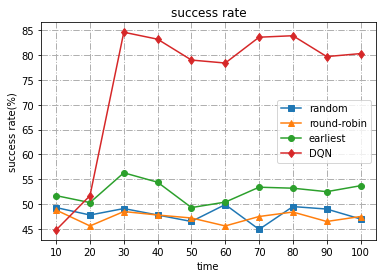

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time
from MyEnv1 import SchedulingEnvironment
from Agent import DQN
from AgentOthers import baselines


performance_lamda = []
EPISODE = 1
policyNum = 4
policyName = ['random', 'round-robin', 'earliest', 'DQN']
start_learn = 500  # DQN parameter
learn_interval = 1   # DQN parameter
global_step = 0  # DQN parameter
environment = SchedulingEnvironment()
brainRL = DQN(environment.actionNum, environment.s_features)
brainOthers = baselines(environment.actionNum, environment.VMtypes)

t_start = time.time()


for episode in range(EPISODE):
    print('----------------------------Episode', episode, '----------------------------')
    job_c = 1  # job counter
    performance_c = 0
    performance_c_time = 1  # counter for getting performance according to time
    performance_showT = 10
    environment.reset()  
    performance_respTs = []
    performance_successes = []

    while True:
        global_step += 1
        finish, job_attrs = environment.workload(job_c)  # job_attrs = [id, arrival_time, length, type, ddl]
        # DQN policy
        DQN_state = environment.getState(job_attrs, 4)  # job type, VM wait time
        print('step:', global_step, '  DQN_state:', DQN_state, end='')
        if global_step != 1:  # store transition
            brainRL.store_transition(last_state, last_action, last_reward, DQN_state)
        action_DQN = brainRL.choose_action(DQN_state)  # choose action
        Energy, reward_DQN = environment.feedback(job_attrs, action_DQN, 4)
        
        if (global_step > start_learn) and (global_step % learn_interval == 0):  # learn
            brainRL.learn()
        print('Energy:', Energy)
        last_state = DQN_state
        last_action = action_DQN
        last_reward = reward_DQN

        # random policy
        action_random = brainOthers.random_choose_action()
        reward_random = environment.feedback(job_attrs, action_random, 1)
        # round robin policy
        action_RR = brainOthers.RR_choose_action(job_c)
        reward_RR = environment.feedback(job_attrs, action_RR, 2)
        # earliest policy
        idleTimes = environment.get_VM_idleT(3)  # get VM state
        action_early = brainOthers.early_choose_action(idleTimes)
        reward_early = environment.feedback(job_attrs, action_early, 3)
        
        # choice 1: get performance according to time
        if job_attrs[1] >= performance_c_time * performance_showT:
            avg_respTs = environment.get_responseTs(policyNum, performance_c, job_c-1)
            performance_respTs.append(avg_respTs)
            successTs = environment.get_successTimes(policyNum, performance_c, job_c-1)
            performance_successes.append(successTs)
            performance_c = job_c - 1
            performance_c_time += 1
        if finish:
            avg_respTs = environment.get_responseTs(policyNum, performance_c, job_c)
            performance_respTs.append(avg_respTs)
            successTs = environment.get_successTimes(policyNum, performance_c, job_c)
            performance_successes.append(successTs)


        job_c += 1
        if finish:
            break

    # episode performance
    startP = 2000
    total_Rewards = environment.get_totalRewards(policyNum, startP)
    avg_allRespTs = environment.get_total_responseTs(policyNum, startP)
    total_success = environment.get_totalSuccess(policyNum, startP)
    avg_util = environment.get_avgUtilitizationRate(policyNum, startP)
    total_Ts = environment.get_totalTimes(policyNum, startP)
    # JobDistribution = environment.get_JobDistribution(policyNum)

    print('total performance (after 2000 jobs):')
    print('[random policy] reward:', total_Rewards[0],
          'success_rate:', total_success[0], ' utilizationRate:', avg_util[0], ' finishT:', total_Ts[0])
    print('[RR policy] reward:', total_Rewards[1],
          'success_rate:', total_success[1], ' utilizationRate:', avg_util[1], ' finishT:', total_Ts[1])
    print('[earliest policy] reward:', total_Rewards[2],
          'success_rate:', total_success[2], ' utilizationRate:', avg_util[2], ' finishT:', total_Ts[2])
    print('[DQN policy] reward:', total_Rewards[3],
          'success_rate:', total_success[3], ' utilizationRate:', avg_util[3], ' finishT:', total_Ts[3])
            
    
t_end = time.time()
timer = round(t_end - t_start, 2)
print('\n', 'timer:', timer, 's')


# pic 1: the successRate in one episode (line pic)
draw_success = np.array(performance_successes) * 100
draw_success = np.around(draw_success, 1)
x = range(draw_success.shape[0])
lables =['s-', '^-', 'o-', 'd-', '*-', 'p-']
plt.figure()
for i in range(policyNum):
    y = draw_success[:, i]
    pn = policyName[i]
    la = lables[i]
    plt.plot(x, y, la, label=pn)

plt.xlabel('time')
plt.ylabel('success rate(%)')
plt.legend(loc='best')  # add legend

# x sticks
x_sticks = np.linspace(0, draw_success.shape[0] - 1, draw_success.shape[0])

x_sticks_names = np.linspace(1*performance_showT, draw_success.shape[0]*performance_showT, draw_success.shape[0])
x_sticks_names = x_sticks_names.astype(int)
plt.xticks(x_sticks, x_sticks_names)

plt.grid(True, linestyle="-.", linewidth=1)
plt.title('success rate')
plt.show()

